In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.tree as tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from imblearn.over_sampling import SMOTE
from collections import Counter
import re

In [ ]:
data = pd.read_csv("investments_VC.csv", encoding= 'unicode_escape').dropna(how = 'all') #total blank rows in csv.
print(data.shape)
print(f"{data.dtypes}\n")
data.head()

(49438, 39)
permalink                object
name                     object
homepage_url             object
category_list            object
 market                  object
 funding_total_usd       object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    floa

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.columns = map(lambda x: x.strip(), data.columns)
data['funding_total_usd'] = data['funding_total_usd'].str.replace(',', '')
data['funding_total_usd'] = data['funding_total_usd'].str.replace('-', '')
data['funding_total_usd'] = data['funding_total_usd'].str.replace(' ', '')

data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')

In [ ]:
#deep copy
df1 = data.drop(columns=['permalink', 'homepage_url'])
print(df1.isna().sum())
df1.head()

name                        1
category_list            3961
market                   3968
funding_total_usd        8531
status                   1314
country_code             5273
state_code              19277
region                   5273
city                     6116
funding_rounds              0
founded_at              10884
founded_month           10956
founded_quarter         10956
founded_year            10956
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C                     0
round_D                     0
round_E   

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Process Category_list

In [ ]:
#get unique categories
df1['market'].nunique()

753

Because there are many categories, with many which could be grouped together being sub categories of others, we employ manual processing to group them to reduce the dimension.

Note that alternatively, binary encoding can be used for categorical variable assuming in production, there is a fixed number of categories; i.e. unseen data having same categories as train/test data.

*Industry list taken from [here](https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-)

In [ ]:
industry_categories = ["Administrative Services", "Advertising", "Agriculture and Farming",
                      "Apps", "Artificial Intelligence", "Biotechnology", "Clothing and Apparel",
                      "Commerce and Shopping", "Community and Lifestyle", "Consumer Electronics",
                      "Consumer Goods", "Content and Publishing", "Data and Analytics",
                      "Design", "Education", "Energy", "Events", "Financial Services",
                      "Food and Beverage", "Gaming", "Government and Military", "Hardware",
                      "Health Care", "Information Technology", "Internet Services"
                      "Lending and Investment", "Manufacturing", "Media and Entertainment",
                      "Messaging and Telecommunications", "Mobile", "Music and Audio",
                      "Natural Resources", "Navigation and Mapping", "Other","Payments",
                      "Platforms", "Privacy and Security", "Professional Services",
                      "Real Estate", "Sales and Marketing", "Science and Engineering",
                      "Software", "Software", "Sustainability", "Transportation",
                      "Travel and Tourism", "Video"]

admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
ai = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotech = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
commerce = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data_ = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

#Create dict struct for ease of traceability
industry_map_l2 = {"Administrative Services":admin_services, "Advertising":advertising,
                   "Agriculture":agriculture, "App":app, "AI":ai, "Biotechnology":biotech,
                   "Clothing and Apparel":clothing, "Commerce":commerce,
                   "Community and Lifestyle":community,"Content and Publishing":content,
                   "Consumer Goods":consumer_goods, "Consumer Electronics":electronics,"Data":data_,
                   "Design":design, "Education":education,  "Energy":energy, "Events":events,
                   "Financial Services":financial, "Food":food, "Gaming":gaming,
                   "Government and Military":government,"Hardware":hardware, "Health Care":health_care,
                   "Information Technology":it,"Internet/IoT":internet,
                   "Lending and Investments":invest, "Manufacturing":manufacturing,"Media":media,
                   "Communications":message, "Mobile":mobile, "Music":music,
                   "Natural Resources":resource, "Navigations":navigation, "Other":other,
                   "Payments":payment, "Platforms":platforms, "Privacy and Security":privacy,
                   "Professional Services":services, "Real Estate":realestate,
                   "Sales and Marketing":sales,"Science and Engineering":science, "Software":software,
                   "Sports":sports,"Sustainability":sustainability, "Transportation":transportation,
                   "Travel":travel,"Video":video
                  }

industry_map_l1 = {"Agriculture":("Agriculture",),
                    "Arts and Entertainment":("Content and Publishing", "Gaming",
                                             "Media", "Music", "Video"),
                    "Consumer Goods":("Consumer Goods",),
                    "Consumer Electronics":("Consumer Eletronics",),
                    "Education":("Education",),
                    "Engineering Sciences":("Biotechnology", "Energy", "Natural Resources",
                                            "Science", "Sustainability"),
                    "Fashion and Lifestyle":("Clothing and Apparel", "Community and Lifestyle",
                                            "Sports","Travel"),
                    "Finance":("Financial Services", "Lending and Investments",
                               "Payments"),
                    "Food":("Food",),
                    "Government":("Government and Military",),
                    "Health Care":("Health Care",),
                    "Other":("Other",),
                    "Real Estate":("Real Estate",),
                    "Retail and Advertising":("Advertising", "Commerce", "Sales and Marketing"),
                    "Services":("Administrative Services", "Events", "Navigations",
                                "Professional Services"),
                    "Software and Technology":("App", "AI", "Data", "Design", "Hardware",
                                              "Internet/IoT", "Information Technology",
                                              "Communications", "Mobile", "Software",
                                              "Platforms", "Privacy and Security"),
                    "Transportation":("Transportation",)
                    }

## merge similar industries into one to reduce dimensionality
finance = financial+invest+payment
art_entertainment = content+gaming+media+music+video
fashion_lifestyle = clothing+community+travel+sports
engineering_science = biotech+energy+resource+science+sustainability
software_tech = app+ai+data_+design+hardware+internet+it+message+mobile+software+platforms+privacy
services = admin_services+events+navigation+services
retail_ad = advertising+commerce+sales

print(industry_map_l1)

{'Agriculture': ('Agriculture',), 'Arts and Entertainment': ('Content and Publishing', 'Gaming', 'Media', 'Music', 'Video'), 'Consumer Goods': ('Consumer Goods',), 'Consumer Electronics': ('Consumer Eletronics',), 'Education': ('Education',), 'Engineering Sciences': ('Biotechnology', 'Energy', 'Natural Resources', 'Science', 'Sustainability'), 'Fashion and Lifestyle': ('Clothing and Apparel', 'Community and Lifestyle', 'Sports', 'Travel'), 'Finance': ('Financial Services', 'Lending and Investments', 'Payments'), 'Food': ('Food',), 'Government': ('Government and Military',), 'Health Care': ('Health Care',), 'Other': ('Other',), 'Real Estate': ('Real Estate',), 'Retail and Advertising': ('Advertising', 'Commerce', 'Sales and Marketing'), 'Services': ('Administrative Services', 'Events', 'Navigations', 'Professional Services'), 'Software and Technology': ('App', 'AI', 'Data', 'Design', 'Hardware', 'Internet/IoT', 'Information Technology', 'Communications', 'Mobile', 'Software', 'Platforms

In [ ]:
%%time
df1['Industry_Group'] = np.where(df1.market.str.contains('|'.join(agriculture), flags=re.IGNORECASE),
                                    "Agriculture",
                               np.where(df1.market.str.contains('|'.join(art_entertainment), flags=re.IGNORECASE),
                                           "Arts and Entertainment",
                               np.where(df1.market.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE),
                                           "Consumer Goods",
                               np.where(df1.market.str.contains('|'.join(electronics), flags=re.IGNORECASE),
                                           "Consumer Electronics",
                                np.where(df1.market.str.contains('|'.join(education), flags=re.IGNORECASE),
                                           "Education",
                                np.where(df1.market.str.contains('|'.join(engineering_science), flags=re.IGNORECASE),
                                           "Engineering Sciences",
                                np.where(df1.market.str.contains('|'.join(fashion_lifestyle), flags=re.IGNORECASE),
                                           "Fashion and Lifestyle",
                                np.where(df1.market.str.contains('|'.join(finance), flags=re.IGNORECASE),
                                           "Finance",
                                np.where(df1.market.str.contains('|'.join(food), flags=re.IGNORECASE),
                                           "Food",
                                np.where(df1.market.str.contains('|'.join(government), flags=re.IGNORECASE),
                                           "Government",
                                np.where(df1.market.str.contains('|'.join(health_care), flags=re.IGNORECASE),
                                           "Health Care",
                                np.where(df1.market.str.contains('|'.join(realestate), flags=re.IGNORECASE),
                                           "Real Estate",
                                np.where(df1.market.str.contains('|'.join(retail_ad), flags=re.IGNORECASE),
                                           "Retail and Advertising",
                                np.where(df1.market.str.contains('|'.join(services), flags=re.IGNORECASE),
                                           "Services",
                                np.where(df1.market.str.contains('|'.join(software_tech), flags=re.IGNORECASE),
                                           "Software and Technology",
                                np.where(df1.market.str.contains('|'.join(transportation), flags=re.IGNORECASE),
                                           "Transportation",
                                np.where(df1.market.str.contains('|'.join(other), flags=re.IGNORECASE),
                                           "Other", "Other")))))))))))))))))
df1.head()

<timed exec>:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
<timed exec>:29: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


CPU times: user 7.58 s, sys: 26.5 ms, total: 7.61 s
Wall time: 9.56 s


,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,Industry_Group
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Arts and Entertainment
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Arts and Entertainment
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Arts and Entertainment
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Consumer Electronics
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fashion and Lifestyle


## EDA

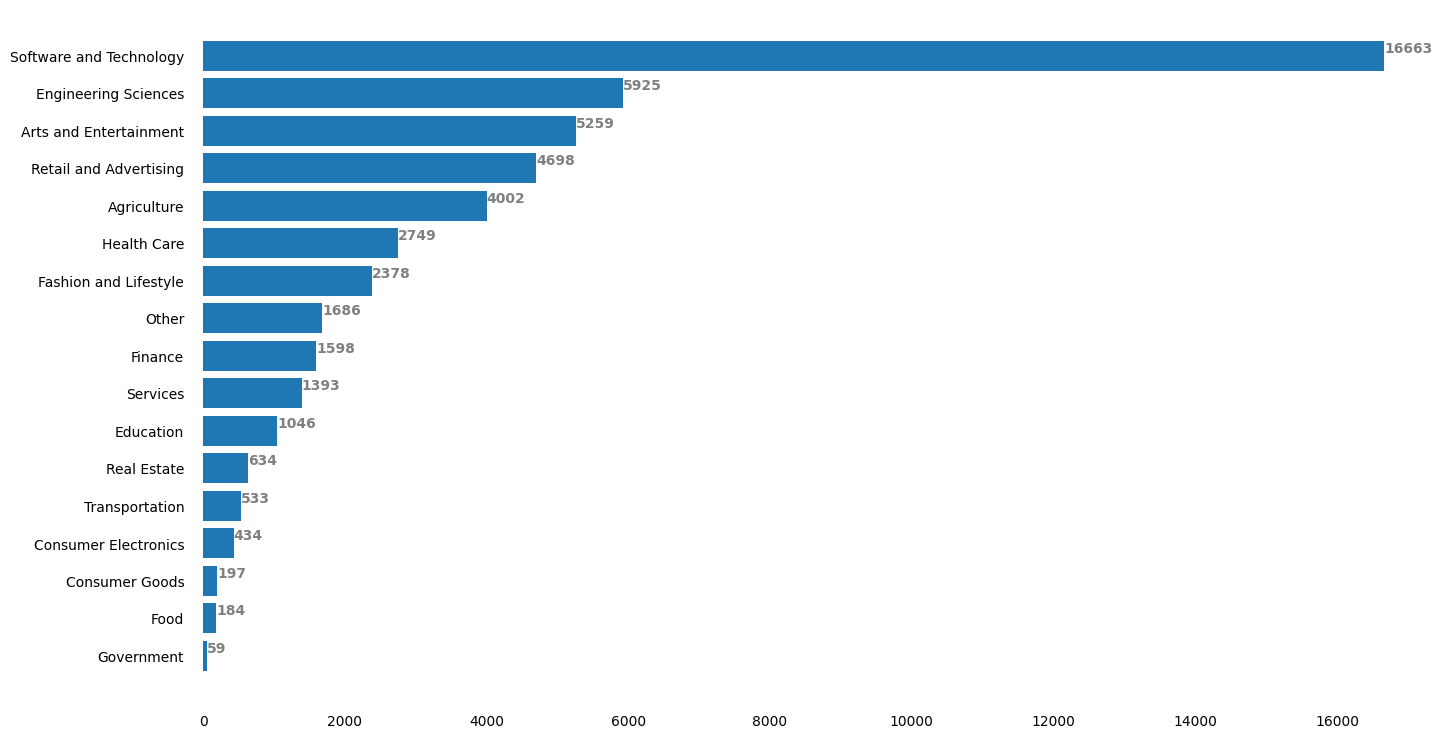

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9))
count_data = df1['Industry_Group'].value_counts()
ax.barh(count_data.index[::-1], count_data.values[::-1])
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

Highly imbalanced data, need to perform stratified train test split for target variable, and industry variables as well. Maybe do not one hot encode first.(i.e. easier to split then encode)

In [ ]:
df1['status'].value_counts()/df1.shape[0]*100

operating    84.609005
acquired      7.467940
closed        5.265181
Name: status, dtype: float64

In [ ]:
##remove useless columns
df1 = df1.drop(columns = ['category_list', 'market','state_code', 'region', 'city'])

for key in industry_map_l1.keys():
    subset = df1[df1['Industry_Group']==key]
    print(key)
    print(f"{subset['status'].value_counts()/len(subset)*100}\n")

Agriculture
operating    84.682659
acquired      3.898051
closed        1.949025
Name: status, dtype: float64

Arts and Entertainment
operating    82.220955
closed        8.138429
acquired      8.005324
Name: status, dtype: float64

Consumer Goods
operating    93.401015
closed        3.553299
acquired      2.538071
Name: status, dtype: float64

Consumer Electronics
operating    85.483871
acquired      7.834101
closed        3.686636
Name: status, dtype: float64

Education
operating    92.065010
acquired      3.632887
closed        2.676864
Name: status, dtype: float64

Engineering Sciences
operating    86.818565
acquired      5.924051
closed        4.658228
Name: status, dtype: float64

Fashion and Lifestyle
operating    88.603869
closed        5.172414
acquired      4.541632
Name: status, dtype: float64

Finance
operating    87.296621
acquired      6.070088
closed        3.754693
Name: status, dtype: float64

Food
operating    95.108696
acquired      3.260870
closed        0.543478
Na

About half of the firms do software/tech related services, following by engineering sciences, and then arts and entertainment. This sparks certain questions: Is it because such services are easily scalable? Popular in demand/hot topic/emerging sector?

Although Software is the most popular, the failure rate is one of the highest. It makes up the biggest proportion of failed startups as well.

In [ ]:
VC_FAILED = df1[df1['status'] == 'closed']
VC_FAILED['Industry_Group'].value_counts()/len(VC_FAILED)

Software and Technology    0.401844
Arts and Entertainment     0.164426
Retail and Advertising     0.117941
Engineering Sciences       0.106032
Fashion and Lifestyle      0.047253
Health Care                0.031118
Agriculture                0.029965
Services                   0.028813
Finance                    0.023050
Other                      0.016519
Education                  0.010757
Transportation             0.006147
Consumer Electronics       0.006147
Real Estate                0.004994
Consumer Goods             0.002689
Government                 0.001921
Food                       0.000384
Name: Industry_Group, dtype: float64

In [ ]:
df1.describe()

,funding_total_usd,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,4.090700e+04,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.591253e+07,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.686788e+08,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000e+00,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.500000e+05,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+06,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+07,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


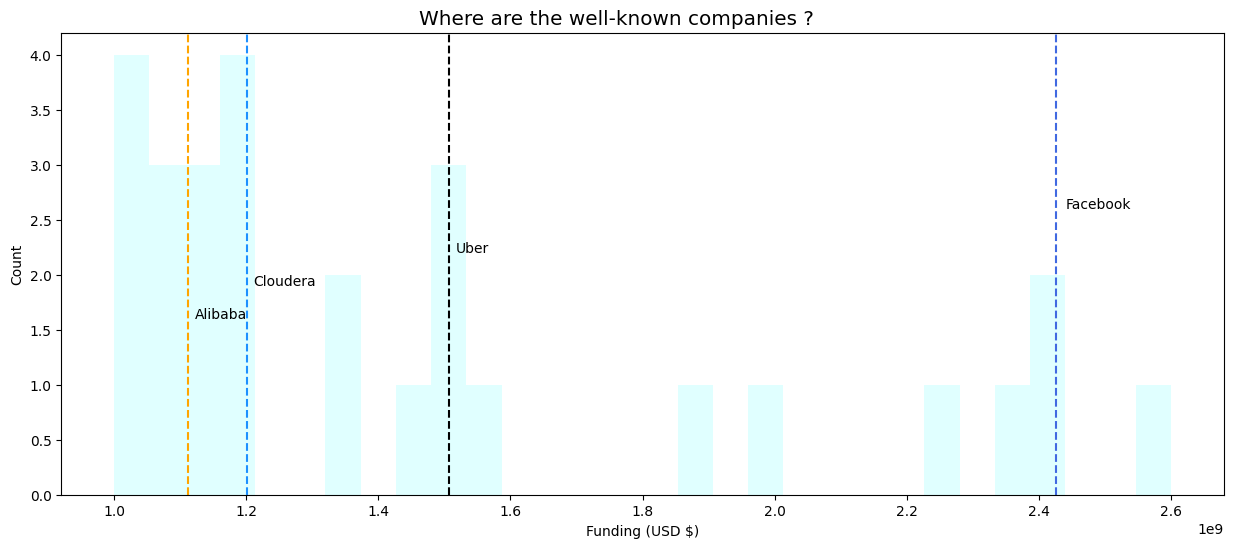

In [ ]:
facebook_total_funding = df1['funding_total_usd'][df1['name']=="Facebook"].values[0]
uber_total_funding = df1['funding_total_usd'][df1['name']=="Uber"].values[0]
alibaba_total_funding = df1['funding_total_usd'][df1['name']=="Alibaba"].values[0]
cloudera_total_funding = df1['funding_total_usd'][df1['name']=="Cloudera"].values[0]

plt.rcParams['figure.figsize'] = 15,6

plt.hist(df1['funding_total_usd'][(df1['funding_total_usd'] >= 1000000000)&(df1['funding_total_usd'] <= 3000000000)].dropna(), bins=30,color = 'lightcyan' )
plt.ylabel('Count')
plt.xlabel('Funding (USD $)')
plt.title("Where are the well-known companies ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(facebook_total_funding,color='royalblue',linestyle ="--")
plt.text(facebook_total_funding+15000000, 2.6,"Facebook")

plt.axvline(uber_total_funding,color='black',linestyle ="--")
plt.text(uber_total_funding+10000000, 2.2,"Uber")

plt.axvline(cloudera_total_funding,color='dodgerblue',linestyle ="--")
plt.text(cloudera_total_funding+10000000, 1.9,"Cloudera")

plt.axvline(alibaba_total_funding,color='orange',linestyle ="--")
plt.text(alibaba_total_funding+10000000, 1.6,"Alibaba")
plt.show()

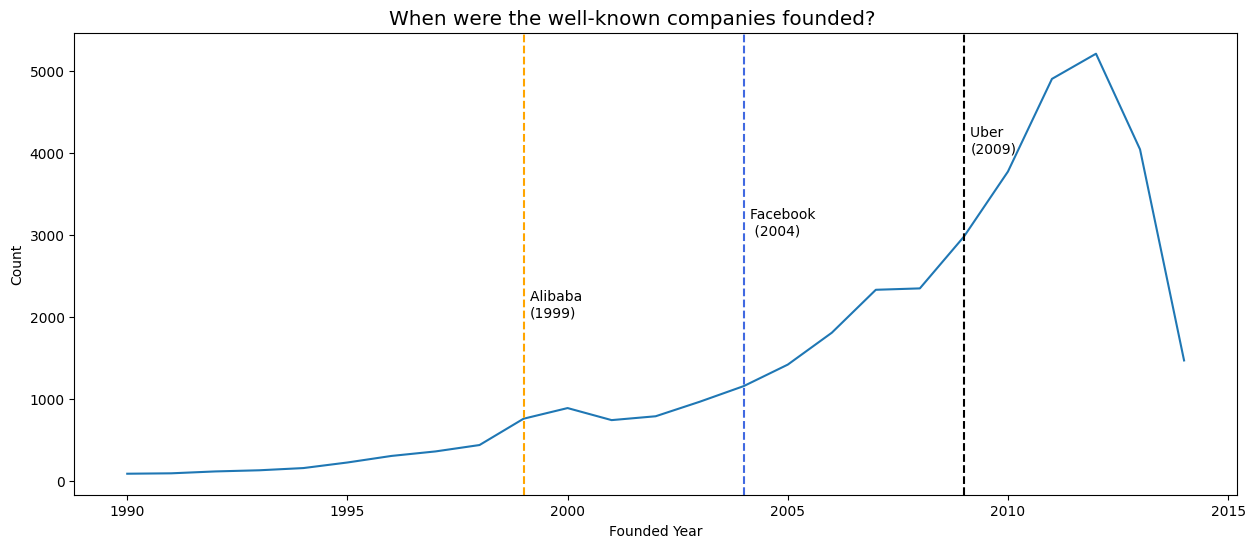

In [ ]:
df1['founded_at'] = pd.to_datetime(df1['founded_at'], errors = 'coerce')

facebook_founded_year = df1['founded_at'][df1['name']=="Facebook"].dt.year.values[0]
uber_founded_year  = df1['founded_at'][df1['name']=="Uber"].dt.year.values[0]
alibaba_founded_year  = df1['founded_at'][df1['name']=="Alibaba"].dt.year.values[0]

plt.rcParams['figure.figsize'] = 15,6
df1['name'][df1["founded_at"].dt.year >= 1990].groupby(df1["founded_at"].dt.year).count().plot(kind="line")
plt.ylabel('Count')

plt.axvline(facebook_founded_year,color='royalblue',linestyle ="--")
plt.text(facebook_founded_year+0.15, 3000,"Facebook \n (2004)")

plt.axvline(uber_founded_year,color='black',linestyle ="--")
plt.text(uber_founded_year+0.15, 4000,"Uber \n(2009)")

plt.axvline(alibaba_founded_year,color='orange',linestyle ="--")
plt.text(alibaba_founded_year+0.15, 2000,"Alibaba \n(1999)")

plt.title("When were the well-known companies founded?", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.ylabel('Count')
plt.xlabel('Founded Year')
plt.show()

In [ ]:
df1.columns

Index(['name', 'funding_total_usd', 'status', 'country_code', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'Industry_Group'],
      dtype='object')

### Feature Engineering

In [ ]:
#turning all date columns in to date
df1['first_funding_at'] =  pd.to_datetime(df1['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')
df1['last_funding_at'] =  pd.to_datetime(df1['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')
df1['founded_year'] =  pd.to_datetime(df1['founded_year'], format='%Y', errors = 'coerce')
df1['founded_month'] =  pd.to_datetime(df1['founded_month'], format='%Y-%m', errors = 'coerce')

In [ ]:
df1.dtypes

name                            object
funding_total_usd              float64
status                          object
country_code                    object
funding_rounds                 float64
founded_at              datetime64[ns]
founded_month           datetime64[ns]
founded_quarter                 object
founded_year            datetime64[ns]
first_funding_at        datetime64[ns]
last_funding_at         datetime64[ns]
seed                           float64
venture                        float64
equity_crowdfunding            float64
undisclosed                    float64
convertible_note               float64
debt_financing                 float64
angel                          float64
grant                          float64
private_equity                 float64
post_ipo_equity                float64
post_ipo_debt                  float64
secondary_market               float64
product_crowdfunding           float64
round_A                        float64
round_B                  

In [ ]:
df1['diff_funding'] = df1['last_funding_at'] - df1['first_funding_at']
df1['diff_funding_months'] = (df1['last_funding_at'] - df1['first_funding_at'])/np.timedelta64(1, 'M')
df1['diff_funding_year'] = round(df1['diff_funding_months']/12)
df1['diff_first_funding'] = df1['first_funding_at'] - df1['founded_at']
df1['diff_first_funding_months'] = (df1['first_funding_at'] - df1['founded_at'])/np.timedelta64(1, 'M')
df1['diff_first_funding_year'] = round(df1['diff_first_funding_months']/12)

#convert diff funding to days
df1['diff_funding'] = df1['diff_funding'] / np.timedelta64(1, 'D')
df1['diff_first_funding'] = df1['diff_first_funding'] / np.timedelta64(1, 'D')

df1.head()

,name,funding_total_usd,status,country_code,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,...,round_F,round_G,round_H,Industry_Group,diff_funding,diff_funding_months,diff_funding_year,diff_first_funding,diff_first_funding_months,diff_first_funding_year
0,#waywire,1750000.0,acquired,USA,1.0,2012-06-01,2012-06-01,2012-Q2,2012-01-01,2012-06-30,...,0.0,0.0,0.0,Arts and Entertainment,0.0,0.000000,0.0,29.0,0.952792,0.0
1,&TV Communications,4000000.0,operating,USA,2.0,NaT,NaT,NaN,NaT,2010-06-04,...,0.0,0.0,0.0,Arts and Entertainment,111.0,3.646892,0.0,NaN,NaN,NaN
2,'Rock' Your Paper,40000.0,operating,EST,1.0,2012-10-26,2012-10-01,2012-Q4,2012-01-01,2012-08-09,...,0.0,0.0,0.0,Arts and Entertainment,0.0,0.000000,0.0,-78.0,-2.562681,-0.0
3,(In)Touch Network,1500000.0,operating,GBR,1.0,2011-04-01,2011-04-01,2011-Q2,2011-01-01,2011-04-01,...,0.0,0.0,0.0,Consumer Electronics,0.0,0.000000,0.0,0.0,0.000000,0.0
4,-R- Ranch and Mine,60000.0,operating,USA,2.0,2014-01-01,2014-01-01,2014-Q1,2014-01-01,2014-08-17,...,0.0,0.0,0.0,Fashion and Lifestyle,40.0,1.314195,0.0,228.0,7.490914,1.0


In [ ]:
import pickle

with open('data_clean.pkl', 'wb') as file:
    pickle.dump(df1, file)

In [ ]:
import pickle
with open('data_clean.pkl', 'rb') as file:
    # Call load method to deserialze
    data = pickle.load(file)

data

,name,funding_total_usd,status,country_code,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,...,round_D,round_E,round_F,round_G,round_H,Industry_Group,diff_funding,diff_funding_months,diff_first_funding_months,diff_funding_year
0,#waywire,1750000.0,acquired,USA,1.0,2012-06-01,2012-06-01,2012-Q2,2012-01-01,2012-06-30,...,0.0,0.0,0.0,0.0,0.0,Arts and Entertainment,0 days,0.000000,0.952792,0.0
1,&TV Communications,4000000.0,operating,USA,2.0,NaT,NaT,NaN,NaT,2010-06-04,...,0.0,0.0,0.0,0.0,0.0,Arts and Entertainment,111 days,3.646892,NaN,0.0
2,'Rock' Your Paper,40000.0,operating,EST,1.0,2012-10-26,2012-10-01,2012-Q4,2012-01-01,2012-08-09,...,0.0,0.0,0.0,0.0,0.0,Arts and Entertainment,0 days,0.000000,-2.562681,0.0
3,(In)Touch Network,1500000.0,operating,GBR,1.0,2011-04-01,2011-04-01,2011-Q2,2011-01-01,2011-04-01,...,0.0,0.0,0.0,0.0,0.0,Consumer Electronics,0 days,0.000000,0.000000,0.0
4,-R- Ranch and Mine,60000.0,operating,USA,2.0,2014-01-01,2014-01-01,2014-Q1,2014-01-01,2014-08-17,...,0.0,0.0,0.0,0.0,0.0,Fashion and Lifestyle,40 days,1.314195,7.490914,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,Zzish,320000.0,operating,GBR,1.0,2013-01-28,2013-01-01,2013-Q1,2013-01-01,2014-03-24,...,0.0,0.0,0.0,0.0,0.0,Education,0 days,0.000000,13.799051,0.0
49434,ZZNode Science and Technology,1587301.0,operating,CHN,1.0,NaT,NaT,NaN,NaT,2012-04-01,...,0.0,0.0,0.0,0.0,0.0,Software and Technology,0 days,0.000000,NaN,0.0
49435,Zzzzapp Wireless ltd.,97398.0,operating,HRV,5.0,2012-05-13,2012-05-01,2012-Q2,2012-01-01,2011-11-01,...,0.0,0.0,0.0,0.0,0.0,Software and Technology,1044 days,34.300499,-6.373848,3.0
49436,[a]list games,9300000.0,operating,NaN,1.0,NaT,NaT,NaN,NaT,2011-11-21,...,0.0,0.0,0.0,0.0,0.0,Arts and Entertainment,0 days,0.000000,NaN,0.0


### We take the standpoint of VCs who wan to invest after Series A. Because we do not know when equity and product crowdfundings were launched, we drop them (18 rows only). Also, we include firms who managed to IPO if post_ipo_equity/debt != 0

In [ ]:
data['funding_total_usd'] = data['funding_total_usd'].fillna(0)
data = data[(data['status']!='operating') | (data['post_ipo_equity']!=0) | (data['post_ipo_debt']!=0)]
print(data.shape)
data.head()

(7900, 37)


,name,funding_total_usd,status,country_code,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,...,round_D,round_E,round_F,round_G,round_H,Industry_Group,diff_funding,diff_funding_months,diff_first_funding_months,diff_funding_year
0,#waywire,1750000.0,acquired,USA,1.0,2012-06-01,2012-06-01,2012-Q2,2012-01-01,2012-06-30,...,0.0,0.0,0.0,0.0,0.0,Arts and Entertainment,0 days,0.000000,0.952792,0.0
5,.Club Domains,7000000.0,NaN,USA,1.0,2011-10-10,2011-10-01,2011-Q4,2011-01-01,2013-05-31,...,0.0,0.0,0.0,0.0,0.0,Software and Technology,0 days,0.000000,19.680076,0.0
6,.Fox Networks,4912393.0,closed,ARG,1.0,NaT,NaT,NaN,NaT,2007-01-16,...,0.0,0.0,0.0,0.0,0.0,Retail and Advertising,0 days,0.000000,NaN,0.0
18,1000 Markets,500000.0,acquired,NaN,1.0,2009-01-01,2009-01-01,2009-Q1,2009-01-01,2009-05-15,...,0.0,0.0,0.0,0.0,0.0,Retail and Advertising,0 days,0.000000,4.402554,0.0
20,1000memories,2535000.0,acquired,USA,2.0,2010-07-01,2010-07-01,2010-Q3,2010-01-01,2010-01-01,...,0.0,0.0,0.0,0.0,0.0,Software and Technology,411 days,13.503357,-5.946734,1.0


In [ ]:
data.columns

Index(['name', 'funding_total_usd', 'status', 'country_code', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'Industry_Group', 'diff_funding', 'diff_funding_months',
       'diff_first_funding_months', 'diff_funding_year'],
      dtype='object')

### Debt financing and equity are not Point-in-Time values, drop along with rounds after seed. We assume convertible notes are at the start.

In [ ]:
col = ['seed', 'country_code','convertible_note', 'angel', 'grant', 'diff_first_funding_months',
        'Industry_Group', 'status']
final_data = data[col].copy()
final_data['total_funding_usd'] = sum(final_data[col] for col in ['seed', 'convertible_note', 'grant',
                                                                 'angel'])
final_data['funding_rounds'] = final_data.apply(lambda x: sum(1 if x[col] != 0 else 0 for col in ['seed',
                                                                                                  'convertible_note',
                                                                                                  'grant','angel']),
                                                              axis=1)
final_data

,seed,country_code,convertible_note,angel,grant,diff_first_funding_months,Industry_Group,status,total_funding_usd,funding_rounds
0,1750000.0,USA,0.0,0.0,0.0,0.952792,Arts and Entertainment,acquired,1750000.0,1
5,0.0,USA,0.0,0.0,0.0,19.680076,Software and Technology,NaN,0.0,0
6,0.0,ARG,0.0,0.0,0.0,NaN,Retail and Advertising,closed,0.0,0
18,500000.0,NaN,0.0,0.0,0.0,4.402554,Retail and Advertising,acquired,500000.0,1
20,15000.0,USA,0.0,0.0,0.0,-5.946734,Software and Technology,acquired,15000.0,1
...,...,...,...,...,...,...,...,...,...,...
49412,0.0,USA,0.0,0.0,0.0,NaN,Other,NaN,0.0,0
49413,340525.0,FRA,0.0,3043700.0,0.0,0.000000,Software and Technology,acquired,3384225.0,2
49414,0.0,USA,0.0,800000.0,0.0,0.000000,Transportation,closed,800000.0,1
49419,0.0,USA,0.0,0.0,1500000.0,48.329534,Engineering Sciences,closed,1500000.0,1


In [ ]:
final_data.isna().sum()

seed                            0
country_code                  846
convertible_note                0
angel                           0
grant                           0
diff_first_funding_months    1813
Industry_Group                  0
status                       1314
total_funding_usd               0
funding_rounds                  0
dtype: int64

In [ ]:
final_data = final_data[~final_data['status'].isna()]
final_data

,seed,country_code,convertible_note,angel,grant,diff_first_funding_months,Industry_Group,status,total_funding_usd,funding_rounds
0,1750000.0,USA,0.0,0.0,0.0,0.952792,Arts and Entertainment,acquired,1750000.0,1
6,0.0,ARG,0.0,0.0,0.0,NaN,Retail and Advertising,closed,0.0,0
18,500000.0,NaN,0.0,0.0,0.0,4.402554,Retail and Advertising,acquired,500000.0,1
20,15000.0,USA,0.0,0.0,0.0,-5.946734,Software and Technology,acquired,15000.0,1
27,750000.0,USA,0.0,0.0,0.0,1.544180,Software and Technology,acquired,750000.0,1
...,...,...,...,...,...,...,...,...,...,...
49411,0.0,GBR,0.0,0.0,0.0,28.945153,Software and Technology,closed,0.0,0
49413,340525.0,FRA,0.0,3043700.0,0.0,0.000000,Software and Technology,acquired,3384225.0,2
49414,0.0,USA,0.0,800000.0,0.0,0.000000,Transportation,closed,800000.0,1
49419,0.0,USA,0.0,0.0,1500000.0,48.329534,Engineering Sciences,closed,1500000.0,1


In [ ]:
final_data.dtypes

seed                         float64
country_code                  object
convertible_note             float64
angel                        float64
grant                        float64
diff_first_funding_months    float64
Industry_Group                object
status                        object
total_funding_usd            float64
funding_rounds                 int64
dtype: object

array([[<Axes: title={'center': 'seed'}>,
        <Axes: title={'center': 'convertible_note'}>,
        <Axes: title={'center': 'angel'}>],
       [<Axes: title={'center': 'grant'}>,
        <Axes: title={'center': 'diff_first_funding_months'}>,
        <Axes: title={'center': 'total_funding_usd'}>],
       [<Axes: title={'center': 'funding_rounds'}>, <Axes: >, <Axes: >]],
      dtype=object)

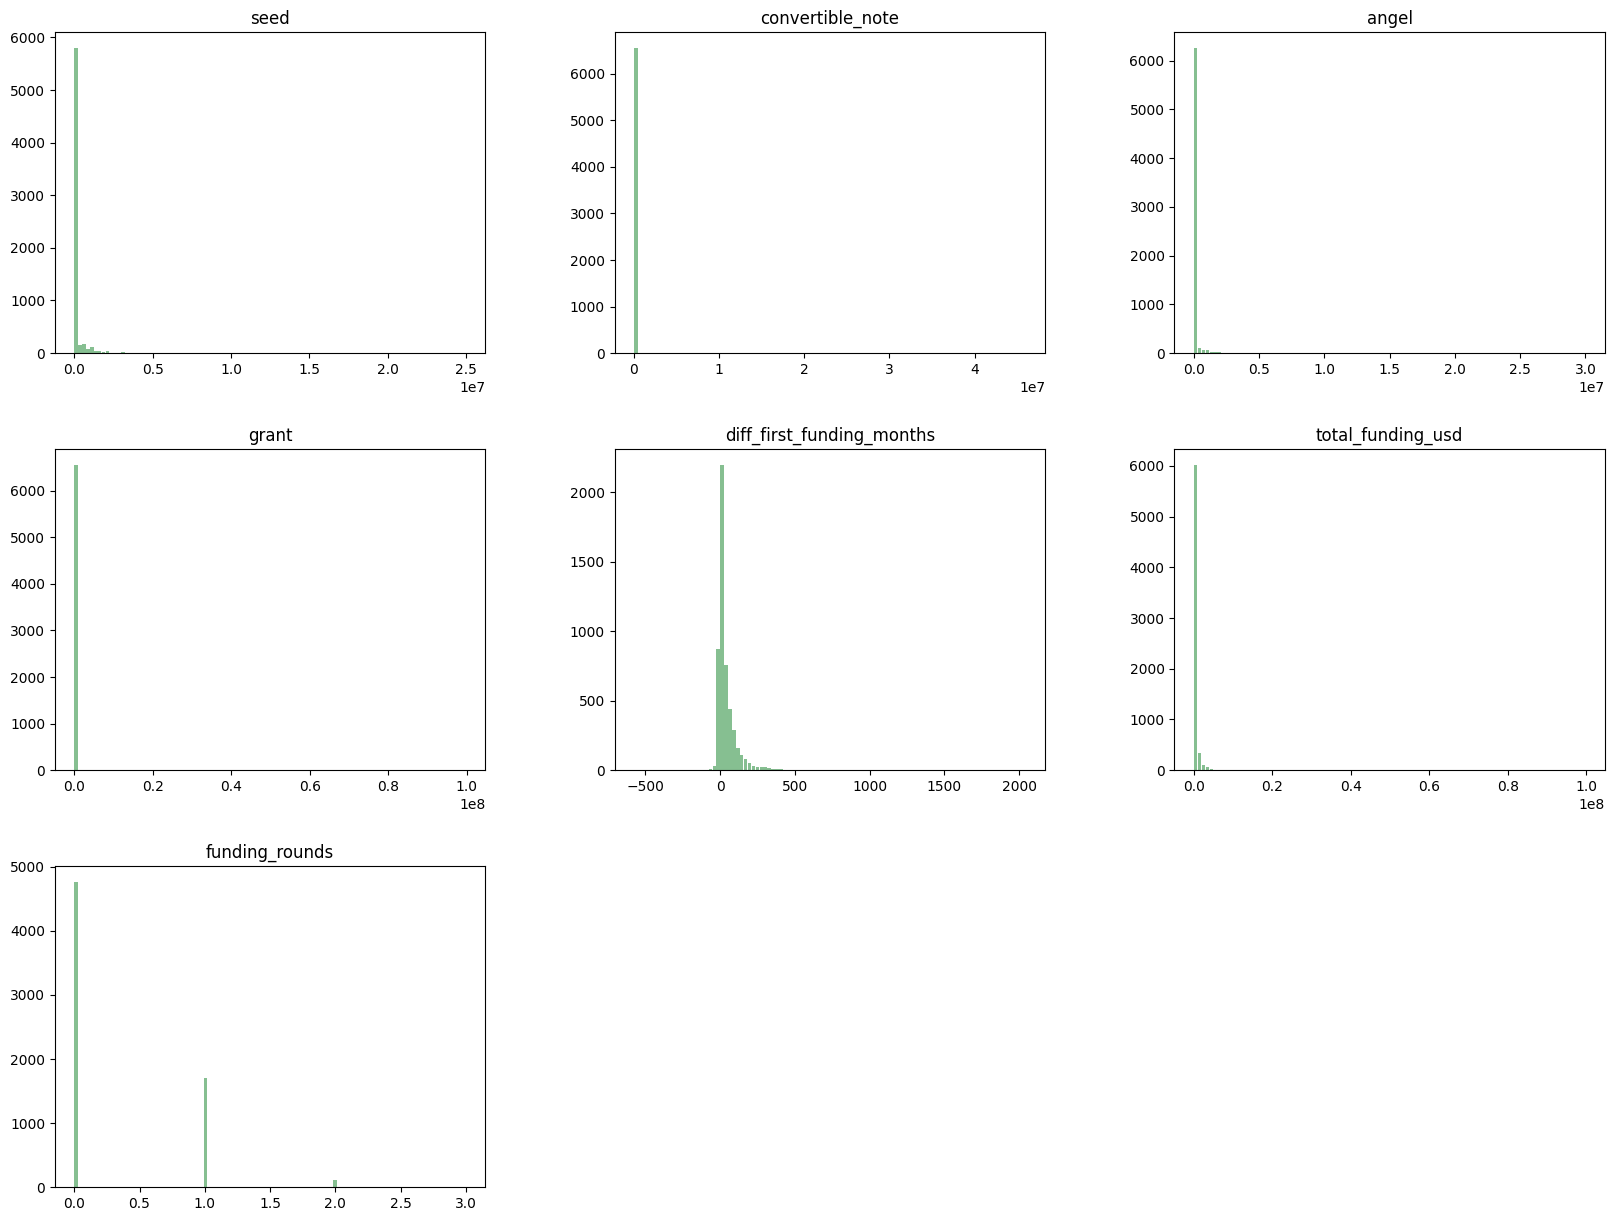

In [ ]:
final_data.hist(column=[col for col in final_data.columns if final_data[col].dtype in ('float64', 'int64')],
          bins=100, grid=False, figsize=(20,15), color='#86bf91', zorder=2, rwidth=0.9)

### data is skewed, we handle using log transformation.
### for `diff_first_funding_months` column, some are negative/NaN, we assume that they got they first launch, hence assigned a sentinel value of 0.

### Funding rounds not transformed as it is discrete value

In [ ]:
final_data['diff_first_funding_months'] = final_data['diff_first_funding_months'].apply(lambda x: 0 if x <0 else x)
final_data = final_data.fillna(0)

<ipython-input-5-ce59b0c5aef7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['diff_first_funding_months'] = final_data['diff_first_funding_months'].apply(lambda x: 0 if x <0 else x)


In [ ]:
final_data.describe()

,seed,convertible_note,angel,grant,diff_first_funding_months,total_funding_usd,funding_rounds
count,6.586000e+03,6.586000e+03,6.586000e+03,6.586000e+03,6586.000000,6.586000e+03,6586.000000
mean,1.579431e+05,1.504470e+04,6.688465e+04,4.792363e+04,35.597010,2.877960e+05,0.294868
std,7.449901e+05,6.010044e+05,5.584825e+05,1.520347e+06,88.820343,1.874355e+06,0.494674
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.657262,0.000000e+00,0.000000
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,38.407359,2.118900e+04,1.000000
max,2.500000e+07,4.600000e+07,3.000000e+07,9.980000e+07,2043.968049,9.980000e+07,3.000000


In [ ]:
cat_invest = pd.cut(final_data.total_funding_usd, bins=[-1, 10**4, 2.1189*10**4, 10**8], labels=['low','medium','high'])
cat_first_funding_months = pd.cut(final_data.diff_first_funding_months, bins=[-1, 8.657262, 38.407359, 2043.968049]	, labels=['early', 'normal', 'late'])

final_data.insert(0,'cat_total_funding',cat_invest)
final_data.insert(0, 'cat_first_funding_time', cat_first_funding_months )

In [ ]:
pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
pip install pycountry_convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 68.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 20.5 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=daba4d779f5086ce7928104a1c2c1fd1e2b6980995ae9f1c9ca006248a4abd9d
  Stored in directory: /root/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [ ]:
import pycountry_convert as pc
import country_converter as coco
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

cc = coco.CountryConverter()

In [ ]:
df = final_data.copy()
col = [col for col in df.columns if df[col].dtype == 'float64']
#df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())
df[col] = np.log(df[col]+1)

df['country'] = df['country_code'].apply(lambda x: 'Romania' if x =='ROM' else \
                                         cc.convert([x], to='name_short') if type(x)==str else \
                                         "NA")
df['country'] = df['country'].apply(lambda x: "Turkey" if x =='Türkiye' else x)
df['continent'] = df['country'].apply(lambda x: 'North America' if x == 'Saint-Martin' else \
                                      country_to_continent(x) if x != "NA" else x)

df = df.drop(columns = ['country', 'country_code'])
df.head()

,cat_first_funding_time,cat_total_funding,seed,convertible_note,angel,grant,diff_first_funding_months,Industry_Group,status,total_funding_usd,funding_rounds,continent
0,early,high,14.375127,0.0,0.0,0.0,0.669260,Arts and Entertainment,acquired,14.375127,1,North America
6,early,low,0.000000,0.0,0.0,0.0,0.000000,Retail and Advertising,closed,0.000000,0,South America
18,early,high,13.122365,0.0,0.0,0.0,1.686872,Retail and Advertising,acquired,13.122365,1,NA
20,early,medium,9.615872,0.0,0.0,0.0,0.000000,Software and Technology,acquired,9.615872,1,North America
27,early,high,13.527830,0.0,0.0,0.0,0.933808,Software and Technology,acquired,13.527830,1,North America


In [ ]:
df.isna().sum()

cat_first_funding_time       0
cat_total_funding            0
seed                         0
convertible_note             0
angel                        0
grant                        0
diff_first_funding_months    0
Industry_Group               0
status                       0
total_funding_usd            0
funding_rounds               0
continent                    0
dtype: int64

In [ ]:
cat_col = ['cat_first_funding_time','cat_total_funding', 'Industry_Group' ,'continent']
cat_encoded = pd.get_dummies(df[cat_col], drop_first = True)
df= pd.concat([df.drop(columns=cat_col+['status']), cat_encoded, df['status']], axis=1)
df.head()

,seed,convertible_note,angel,grant,diff_first_funding_months,total_funding_usd,funding_rounds,cat_first_funding_time_normal,cat_first_funding_time_late,cat_total_funding_medium,...,Industry_Group_Services,Industry_Group_Software and Technology,Industry_Group_Transportation,continent_Asia,continent_Europe,continent_NA,continent_North America,continent_Oceania,continent_South America,status
0,14.375127,0.0,0.0,0.0,0.669260,14.375127,1,0,0,0,...,0,0,0,0,0,0,1,0,0,acquired
6,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,closed
18,13.122365,0.0,0.0,0.0,1.686872,13.122365,1,0,0,0,...,0,0,0,0,0,1,0,0,0,acquired
20,9.615872,0.0,0.0,0.0,0.000000,9.615872,1,0,0,1,...,0,1,0,0,0,0,1,0,0,acquired
27,13.527830,0.0,0.0,0.0,0.933808,13.527830,1,0,0,0,...,0,1,0,0,0,0,1,0,0,acquired


### Transform Y var: successful {Acquired, IPO}| failure {Closed}

In [ ]:
df['status'] = df['status'].apply(lambda x: 1 if x != 'closed' else 0)
df.status.value_counts()

1    3983
0    2603
Name: status, dtype: int64

In [ ]:
df.head()

,seed,convertible_note,angel,grant,diff_first_funding_months,total_funding_usd,funding_rounds,cat_first_funding_time_normal,cat_first_funding_time_late,cat_total_funding_medium,...,Industry_Group_Services,Industry_Group_Software and Technology,Industry_Group_Transportation,continent_Asia,continent_Europe,continent_NA,continent_North America,continent_Oceania,continent_South America,status
0,14.375127,0.0,0.0,0.0,0.669260,14.375127,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18,13.122365,0.0,0.0,0.0,1.686872,13.122365,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
20,9.615872,0.0,0.0,0.0,0.000000,9.615872,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
27,13.527830,0.0,0.0,0.0,0.933808,13.527830,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


### Make train-test sets

In [ ]:
X, y = df[df.columns[:-1]], df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(4610, 33)

## Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

In [ ]:
pr_success, pr_failure = y_test.value_counts(normalize=True)[1], y_test.value_counts(normalize=True)[0]
initial_amt = 10**8
roi = 0.3

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def train(X_train, y_train, X_test, y_test, *model, scoring, threshold = np.arange(0.5,1,0.01), verbose =False):

    if scoring not in ('roc_auc', 'tpr-fpr'):
        raise ValueError("unsupported/wrong scoring value")

    scores = dict()
    for model_ in model:
        scores[model_] = []
        clf = model_.fit(X_train, y_train)
        if scoring =='tpr-fpr':
          for t in threshold:
              y_pred = np.array(list(map(lambda x: 1 if x else 0,
                                        (clf.predict_proba(X_test)[:,1] >= t))))

              if verbose:
                  print(model_)
                  cm = get_metrics(clf, y_test, y_pred, verbose)
              else:
                  cm = get_metrics(clf, y_test, y_pred)

              metrics = get_ratios(cm)
              metrics['threshold'] = t
              TPR, FPR = metrics['TPR'], metrics['FPR']
              EP = pr_success*TPR*0.3 - (1-pr_success)*FPR
              metrics['EP'] = EP

              scores[model_].append(metrics)

        elif scoring =='roc_auc':

            y_pred_prob = clf.predict_proba(X_test)
            y_pred = np.array(list(map(lambda x: 1 if x else 0, y_pred_prob[:,1] >= 0.5)))

            cm = get_metrics(clf, y_test, y_pred)
            metrics = get_ratios(cm)
            roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])

            scores[model_] = metrics
            scores[model_]['ROC_AUC'] = roc_auc

            if verbose:
                fpr, tpr, _ = roc_curve(y_test,  y_pred_prob[:,1])
                plt.plot(fpr,tpr,label=f'{model}: {roc_auc}')
                plt.xlabel('FPR')
                plt.ylabel('TPR')
                plt.legend(loc=4)
                plt.show()

    return scores

def get_metrics(model, y_test, y_pred, verbose = False):
    cm = confusion_matrix(y_test, y_pred)
    if verbose:
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()

        plt.show()
        print(classification_report(y_test, y_pred))
    return cm

def get_ratios (cm):
    ###########
    # Get the relavant ratios given a confusion matrix
    # Input: cm is a 2*2 confusion matrix
    # Output: Accuracy, TPR, FNR, TNR, and FPR
    ###########

    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    TPR = TP/(TP+FN) # True Positive Rate (sensitivity/recall)
    FNR = FN/(TP+FN) # False Negative Rate (miss rate)
    TNR = TN/(TN+FP) # True Negative Rate (specificity)
    FPR = FP/(TN+FP) # False Positive Rate (fall-out)

    Accuracy = (TP+TN)/(TP+FN+FP+TN)

    return {'Acc':Accuracy, 'TPR': TPR, 'FNR': FNR, 'TNR': TNR, 'FPR': FPR}

## AUC ROC

In [ ]:
%%time
auc_scores = train(X_train, y_train, X_test, y_test, LogisticRegression(random_state=42, max_iter=10000),
                                                    RandomForestClassifier(random_state=0),
                                                    AdaBoostClassifier(),
                                                    XGBClassifier(),
                                                    GradientBoostingClassifier(),
                                                    SVC(probability=True),
                                                    SVC(kernel='linear', probability=True),
                                                    SVC(kernel='sigmoid', probability=True),
                                                    SVC(kernel='poly', probability=True),
                                                    lgb.LGBMClassifier(),
                                                    ExtraTreesClassifier(),
                                                    KNeighborsClassifier(),
                                                    DecisionTreeClassifier(),
                   scoring = 'roc_auc')
auc_scores

CPU times: user 36.8 s, sys: 845 ms, total: 37.7 s
Wall time: 43.7 s


{LogisticRegression(max_iter=10000, random_state=42): {'Acc': 0.6766194331983806,
  'TPR': 0.8438287153652393,
  'FNR': 0.1561712846347607,
  'TNR': 0.4229299363057325,
  'FPR': 0.5770700636942675,
  'ROC_AUC': 0.6922807467898838},
 RandomForestClassifier(random_state=0): {'Acc': 0.6265182186234818,
  'TPR': 0.7246011754827876,
  'FNR': 0.2753988245172124,
  'TNR': 0.47770700636942676,
  'FPR': 0.5222929936305732,
  'ROC_AUC': 0.6430800002139185},
 AdaBoostClassifier(): {'Acc': 0.667004048582996,
  'TPR': 0.8278757346767422,
  'FNR': 0.17212426532325778,
  'TNR': 0.4229299363057325,
  'FPR': 0.5770700636942675,
  'ROC_AUC': 0.6860498323412857},
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None

|Model|AUC|
|-----|----|
|LogisticRegression|<mark>0.692|
|RandomForest| 0.643|
|AdaBoost|<mark> 0.686|
|XGBoost|<mark> 0.673|
|GradientBoosting|<mark> 0.693|
|SVC(RBF)|0.673|
|SVC(linear)|0.671|
|SVC(sigmoid)|0.519|
|SVC(poly)|0.667|
|LightGradientBoosting|<mark>0.677|
|ExtraTreesClassifier|0.621|
|KNeighboursClassifier|0.636|
|DecisionTreeClassifier|0.586|

ROC Curves summarize the trade-off between the true positive rate/sensitivity and false positive rate/specificity for a predictive model using different probability thresholds.
Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
You use PR curve when you are more concerned with the positive/1 class and not really the negative/0 class.
Use ROC if you are concerned with both.


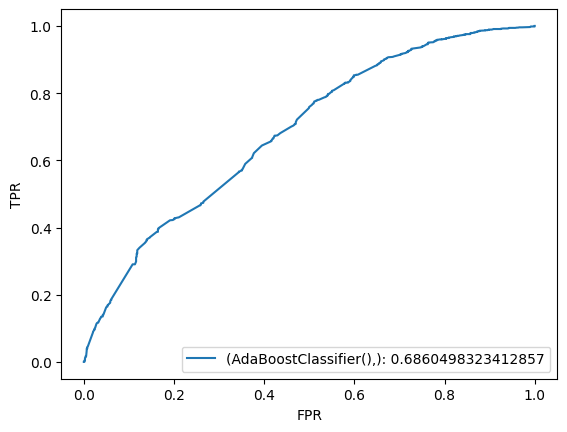

{AdaBoostClassifier(): {'Acc': 0.667004048582996,
  'TPR': 0.8278757346767422,
  'FNR': 0.17212426532325778,
  'TNR': 0.4229299363057325,
  'FPR': 0.5770700636942675,
  'ROC_AUC': 0.6860498323412857}}

In [ ]:
train(X_train, y_train, X_test, y_test, AdaBoostClassifier(), scoring ='roc_auc', verbose=True)

## Hyperparameter tuning (AUC ROC)

In [ ]:
from hyperopt import hp, tpe, fmin, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold

In [ ]:
def average_AUC(clf, X, y):
    scores = []
    skf = StratifiedKFold()
    # kfold cv
    for train_idx, val_idx in skf.split(X, y):

        train_X, train_y, val_X, val_y = X.iloc[train_idx], y.iloc[train_idx], X.iloc[val_idx], y.iloc[val_idx]
        clf.fit(train_X, train_y)

        threshold = np.arange(0.5,1,0.05)
        best_auc = 0

        y_pred = clf.predict_proba(val_X)[:,1]
        auc = roc_auc_score(val_y, y_pred)

        if auc > best_auc:
            best_auc = auc

        scores.append(best_auc)

    return sum(scores)/len(scores)

best = 0
def f(params):
    global best
    res = get_AUC(params)
    if res > best:
       best = res
    return {'loss': -res, 'status': STATUS_OK}

### XGBoost

In [ ]:
## XGBoost tuning

def get_AUC(params):
   clf = XGBClassifier(**params)
   return average_AUC(clf, X_train, y_train)


param_space = {'learning_rate': hp.uniform('learning_rate', 0.1,0.6),
               'max_depth': hp.choice('max_depth', range(3,20)),
               'n_estimators': hp.choice('n_estimators', range(10,200)),
               'min_child_weight': hp.choice('min_child_weight', range(0,5)),
               'gamma': hp.uniform ('gamma', 1,5),
               'max_leaves': hp.choice('max_leaves', range(0,10)),
               'scale_pos_weight' : hp.uniform('scale_pos_weight', 0.67, 1),
               'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
               'reg_lambda' : hp.uniform('reg_lambda', 0,1),
               'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1)}
best = 0
XGBoost_best_auc = best
trials = Trials()
best_params = fmin(f, param_space , algo=tpe.suggest,max_evals=200, trials= trials)
print('Best auc:', best)
print('Best params:', best_params)

100%|██████████| 200/200 [09:51<00:00,  2.96s/trial, best loss: -0.715385483105254]
Best auc: 0.715385483105254
Best params: {'colsample_bytree': 0.6693875950755404, 'gamma': 1.009597119358529, 'learning_rate': 0.5798535772523375, 'max_depth': 5, 'max_leaves': 2, 'min_child_weight': 1, 'n_estimators': 180, 'reg_alpha': 41.0, 'reg_lambda': 0.1372969760797611, 'scale_pos_weight': 0.9082102792710671}


In [ ]:
# Gradient Boosting classifier tuning

%%time

def get_AUC(params):
   clf = GradientBoostingClassifier(**params)
   return average_AUC(clf, X_train, y_train)

param_space = {'learning_rate': hp.uniform('learning_rate', 0.1,0.6),
               'max_depth': hp.choice('max_depth', range(3,20)),
               'n_estimators': hp.choice('n_estimators', range(10,200)),
               'min_samples_split': hp.choice('min_samples_split', range(2,5)),
               'min_samples_leaf': hp.choice('min_samples_leaf', range(1,10)),
               'max_features' : hp.choice('max_features', range(3,15))}

best = 0

GradBoost_best = best
trials = Trials()
best_params = fmin(f, param_space , algo=tpe.suggest,max_evals=200, trials= trials)
print('New best:', best)
print('Best params:', best_params)

100%|██████████| 200/200 [09:04<00:00,  2.72s/trial, best loss: -0.7210558656374655]
New best: 0.7210558656374655
Best params: {'learning_rate': 0.10066555059230602, 'max_depth': 0, 'max_features': 2, 'min_samples_leaf': 8, 'min_samples_split': 0, 'n_estimators': 78}
CPU times: user 8min 59s, sys: 1.27 s, total: 9min 1s
Wall time: 9min 4s


### LightGBM

In [ ]:
# LightGBM classifier tuning

%%time

def get_AUC(params):
   clf = lgb.LGBMClassifier(**params)
   return average_AUC(clf, X_train, y_train)

param_space = {'num_leaves': hp.choice('num_leaves', [20, 30, 40]),
               'learning_rate': hp.uniform('learning_rate', 0.1,0.6),
               'max_depth': hp.choice('max_depth', range(3,20)),
               'n_estimators': hp.choice('n_estimators', range(10,200)),
               'min_child_samples': hp.choice('min_child_weight', range(10, 30)),
               'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
               'reg_lambda' : hp.uniform('reg_lambda', 0,1)}

best = 0


LightGBM_best = best
trials = Trials()
best_params = fmin(f, param_space , algo=tpe.suggest,max_evals=1000, trials= trials)
print('New best:', best)
print('Best params:', best_params)

100%|██████████| 1000/1000 [03:52<00:00,  4.31trial/s, best loss: -0.7105638211576626]
New best: 0.7105638211576626
Best params: {'learning_rate': 0.32725506411611405, 'max_depth': 1, 'min_child_weight': 14, 'n_estimators': 39, 'num_leaves': 2, 'reg_alpha': 40.0, 'reg_lambda': 0.5513418692980336}
CPU times: user 6min 15s, sys: 5.2 s, total: 6min 20s
Wall time: 3min 52s


### Logistic Regression

In [ ]:
## Logistic Regression tuning
%%time

def get_AUC(params):
   clf = LogisticRegression(**params)
   return average_AUC(clf, X_train, y_train)

best = 0

param_space = {'penalty': hp.choice('penalty', ['l1', 'l2']),
               'C': hp.choice('C', [100, 10, 1.0, 0.1, 0.01, 0.001]),
               'class_weight': hp.choice('class_weight', ['balanced', None]),
               'solver': hp.choice('solver', ['liblinear', 'saga'])}

Lr_best_auc = best
trials = Trials()
best_params = fmin(f, param_space , algo=tpe.suggest,max_evals=200, trials= trials)
print('Best auc:', best)
print('Best params:', best_params)

100%|██████████| 200/200 [02:12<00:00,  1.51trial/s, best loss: -0.7200272206708476]
Best auc: 0.7200272206708476
Best params: {'C': 1, 'class_weight': 1, 'penalty': 0, 'solver': 0}
CPU times: user 2min 12s, sys: 1min 7s, total: 3min 19s
Wall time: 2min 12s


### AdaBoost

In [ ]:
## AdaBoost tuning
%%time

def get_AUC(params):
   clf = AdaBoostClassifier(**params)
   return average_AUC(clf, X_train, y_train)

best = 0

param_space = {'learning_rate': hp.uniform('learning_rate', 0.1,0.6),
               'n_estimators': hp.choice('n_estimators', range(10,200))}

AdaBoost_best_auc = best
trials = Trials()
best_params = fmin(f, param_space , algo=tpe.suggest,max_evals=200, trials= trials)
print('Best auc:', best)
print('Best params:', best_params)

100%|██████████| 200/200 [06:17<00:00,  1.89s/trial, best loss: -0.7221243157980183]
Best auc: 0.7221243157980183
Best params: {'learning_rate': 0.584526387401609, 'n_estimators': 41}
CPU times: user 6min 15s, sys: 1.22 s, total: 6min 16s
Wall time: 6min 17s


## AdaBoost, LogisticRegression, GBC have the best ROC AUC - it is the most robust given this set of hyperparameters. We use this to evaluate the $EP$ at different thresholds.

## EP
## Find model that gives highest $EP$, where $
\begin{align}
EP&=\mathbb{E}(Profit)*Pr(invest\ in\ successful\ startup)-\mathbb{E}(Loss)*Pr(invest\ in\ failed\ startup)\\
&=IRR*Pr(success)*TPR-Pr(failure)*FPR\\
\end{align}
where\ IRR=0.3
$

In [ ]:
%%time
tpr_fpr = train(X_train, y_train, X_test, y_test, AdaBoostClassifier(**{'learning_rate': 0.584526387401609, 'n_estimators': 51}),
                                                  XGBClassifier(**{'colsample_bytree': 0.6693875950755404, 'gamma': 1.009597119358529, 'learning_rate': 0.5798535772523375, 'max_depth': 8,
                                                                    'max_leaves': 2, 'min_child_weight': 1, 'n_estimators': 190, 'reg_alpha': 41.0, 'reg_lambda': 0.1372969760797611,
                                                                    'scale_pos_weight': 0.9082102792710671}),
                                                  lgb.LGBMClassifier(**{'learning_rate': 0.32725506411611405, 'max_depth': 4, 'min_child_weight': 24, 'n_estimators': 49, 'num_leaves': 30,
                                                                        'reg_alpha': 40.0, 'reg_lambda': 0.5513418692980336}),
                                                  LogisticRegression(**{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}),
                                                  GradientBoostingClassifier(**{'learning_rate': 0.10066555059230602, 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 9,
                                                                                'min_samples_split': 2, 'n_estimators': 88}),
                   scoring='tpr-fpr')
tpr_fpr

CPU times: user 4.95 s, sys: 285 ms, total: 5.24 s
Wall time: 3.51 s


{AdaBoostClassifier(learning_rate=0.584526387401609, n_estimators=51): [{'Acc': 0.6700404858299596,
   'TPR': 0.8236775818639799,
   'FNR': 0.17632241813602015,
   'TNR': 0.4369426751592357,
   'FPR': 0.5630573248407643,
   'threshold': 0.5,
   'EP': -0.07474696356275307},
  {'Acc': 0.5364372469635628,
   'TPR': 0.3022670025188917,
   'FNR': 0.6977329974811083,
   'TNR': 0.89171974522293,
   'FPR': 0.10828025477707007,
   'threshold': 0.51,
   'EP': 0.011639676113360316},
  {'Acc': 0.402834008097166,
   'TPR': 0.012594458438287154,
   'FNR': 0.9874055415617129,
   'TNR': 0.9949044585987261,
   'FPR': 0.005095541401273885,
   'threshold': 0.52,
   'EP': 0.00025303643724696335},
  {'Acc': 0.39878542510121456,
   'TPR': 0.005037783375314861,
   'FNR': 0.9949622166246851,
   'TNR': 0.9961783439490446,
   'FPR': 0.003821656050955414,
   'threshold': 0.53,
   'EP': -0.0006072874493927129},
  {'Acc': 0.39878542510121456,
   'TPR': 0.005037783375314861,
   'FNR': 0.9949622166246851,
   'TNR': 

In [ ]:
ada_EPs = [dict_['EP'] for dict_ in tpr_fpr[list(tpr_fpr.keys())[0]]]
xgb_EPs = [dict_['EP'] for dict_ in tpr_fpr[list(tpr_fpr.keys())[1]]]
lgbm_EPs = [dict_['EP'] for dict_ in tpr_fpr[list(tpr_fpr.keys())[2]]]
lr_EPs = [dict_['EP'] for dict_ in tpr_fpr[list(tpr_fpr.keys())[-2]]]
gbc_EPs = [dict_['EP'] for dict_ in tpr_fpr[list(tpr_fpr.keys())[-1]]]
sorted(ada_EPs)[-1], sorted(xgb_EPs)[-1], sorted(lgbm_EPs)[-1], sorted(lr_EPs)[-1],sorted(gbc_EPs)[-1],

(0.011639676113360316,
 0.013917004048582989,
 0.014524291497975704,
 0.013309716599190273,
 0.015991902834008087)

### GradientBoostingClassifier gives the best EP for a given threshold, we will We tune for all 5 models to see what's the highest $EP$

### We assume average IRR of 30% if the firm we choose to invest in is actually successful on random.

|Model| Highest EP (%)| EP given 100m investment|
|-----|---------------|-------------------------|
|AdaBoost| 1.16| 1.16m |
|XGBoost| 1.39| 1.39m|
|LGBM| 1.45| 1.45m|
|LogisticRegression| 1.33| 1.33m|
|<mark>GradientBoosting|1.60| 1.60m |


$\begin{align}
Pr(invest)&=Pr(invest\ in\ successful\ startup)+Pr(invest\ in\ failed\ startup)\\
&=Pr(successful\ startup)*TPR+Pr(failed\ startup)*FPR\\
&=0.6*0.237+0.4*0.0675\\
&=16.75\%
\end{align}
$

Basic Probability Approach:
$\begin{align}
\mathbb{E}P*Q\ge (1-Q)*\mathbb{L} \implies Q &\ge \frac{\mathbb{E}P}{\mathbb{E}(P+L)}\\
&\ge \frac{1}{1+0.3}=0.77
\end{align}
$


## Supporting Visualisation for $EP$

In [ ]:
EP_gbc = gbc_EPs.copy()
zrange = np.arange(0.5,1,0.01) #range of thresholds
random_gbc = EP_gbc[0] + zrange * (EP_gbc[-1] - EP_gbc[0])

TPR_gbc = [dict_['TPR'] for dict_ in tpr_fpr[list(tpr_fpr.keys())[-1]]]
FPR_gbc = [dict_['FPR'] for dict_ in tpr_fpr[list(tpr_fpr.keys())[-1]]]

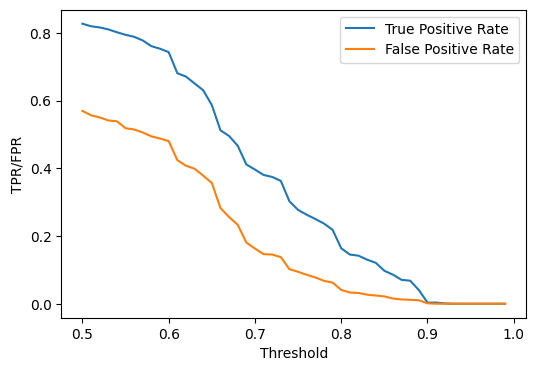

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(zrange, TPR_gbc, label = "True Positive Rate")
plt.plot(zrange, FPR_gbc, label = "False Positive Rate")
plt.xlabel("Threshold")
plt.ylabel("TPR/FPR")
plt.legend(loc=1)
plt.show()

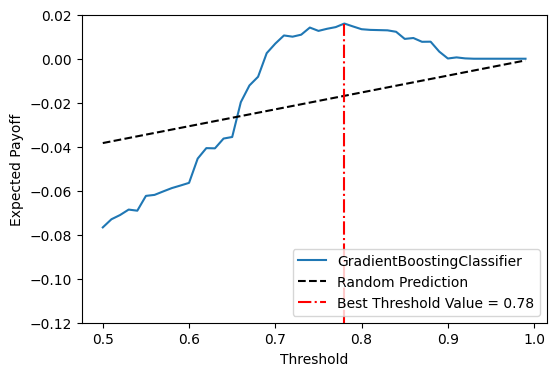

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(zrange, EP_gbc, label = "GradientBoostingClassifier")
plt.plot(zrange, random_gbc, label = "Random Prediction", linestyle = '--', color = 'k')
plt.vlines(x = zrange[EP_gbc.index(max(EP_gbc))], ymin = -0.12, ymax = max(EP_gbc), colors = 'r', linestyle = '-.', label = "Best Threshold Value = " + str(round(zrange[EP_gbc.index(max(EP_gbc))], 2)))
plt.xlabel("Threshold")
plt.ylabel("Expected Payoff")
plt.legend(loc=4)
plt.ylim([-0.12, 0.02])
plt.show()

## Feature Importance

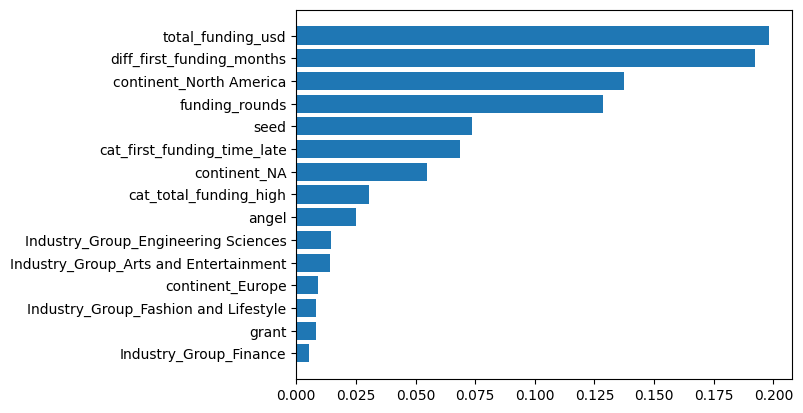

In [ ]:
gbc = GradientBoostingClassifier(**{'learning_rate': 0.10066555059230602, 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 9,
                                    'min_samples_split': 2, 'n_estimators': 88})

gbc.fit(X_train, y_train)
# plot feature importance manually
feat_impt_scores = gbc.feature_importances_
#print(feat_impt_scores)

#print(gbc.feature_names_in_[np.argsort(feat_impt_scores)][::-1])
plt.barh(gbc.feature_names_in_[np.argsort(feat_impt_scores)][-15:], sorted(gbc.feature_importances_)[-15:])
plt.show()

## Hyperparameter tuning (EP)

In [ ]:
pr_success, pr_failure = y_test.value_counts(normalize=True)[1], y_test.value_counts(normalize=True)[0]
#test for 3x return
test_amount, roi = 10**8, 0.3

In [ ]:
def average_EP(clf, X, y):
    scores = []
    skf = StratifiedKFold()
    # kfold cv
    for train_idx, val_idx in skf.split(X, y):

        train_X, train_y, val_X, val_y = X.iloc[train_idx], y.iloc[train_idx], X.iloc[val_idx], y.iloc[val_idx]
        clf.fit(train_X, train_y)

        threshold = np.arange(0.5,1,0.05)
        best_EP = -10**8

        for t in threshold:

            y_pred = np.array(list(map(lambda x: 1 if x else 0,
                                      (clf.predict_proba(val_X)[:,1] >= t))))

            cm = get_metrics(clf, val_y, y_pred)
            metrics = get_ratios(cm)
            metrics['threshold'] = t
            TPR, FPR = metrics['TPR'], metrics['FPR']
            EP = pr_success*TPR*test_amount*roi - pr_failure*FPR*test_amount
            if EP > best_EP:
                best_EP = EP

        scores.append(best_EP)

    return sum(scores)/len(scores)

best = 0
def f(params):
    global best
    res = get_EP(params)
    if res > best:
       best = res
    return {'loss': -res, 'status': STATUS_OK}

In [ ]:
## XGBoost tuning

def get_EP(params):
   clf = XGBClassifier(**params)
   return average_EP(clf, X_train, y_train)


param_space = {'learning_rate': hp.uniform('learning_rate', 0.1,0.6),
               'max_depth': hp.choice('max_depth', range(3,20)),
               'n_estimators': hp.choice('n_estimators', range(10,200)),
               'min_child_weight': hp.choice('min_child_weight', range(0,5)),
               'gamma': hp.uniform ('gamma', 1,5),
               'max_leaves': hp.choice('max_leaves', range(0,10)),
               'scale_pos_weight' : hp.uniform('scale_pos_weight', 0.67, 1),
               'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
               'reg_lambda' : hp.uniform('reg_lambda', 0,1),
               'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1)}
best = 0
XGBoost_best = best
trials = Trials()
best_params = fmin(f, param_space , algo=tpe.suggest,max_evals=250, trials= trials)
print('Best auc:', best)
print('Best params:', best_params)

100%|██████████| 250/250 [12:55<00:00,  3.10s/trial, best loss: -1756591.0985221714]
Best auc: 1756591.0985221714
Best params: {'colsample_bytree': 0.8835692678386231, 'gamma': 1.0793941033439793, 'learning_rate': 0.44965939089001905, 'max_depth': 0, 'max_leaves': 6, 'min_child_weight': 1, 'n_estimators': 160, 'reg_alpha': 50.0, 'reg_lambda': 0.47259814578492243, 'scale_pos_weight': 0.8972444984716466}


In [ ]:
# GradientBoosting classifier tuning

%%time

def get_EP(params):
   clf = GradientBoostingClassifier(**params)
   return average_EP(clf, X_train, y_train)

param_space = {'learning_rate': hp.uniform('learning_rate', 0.1,0.6),
               'max_depth': hp.choice('max_depth', range(3,20)),
               'n_estimators': hp.choice('n_estimators', range(10,200)),
               'min_samples_split': hp.choice('min_samples_split', range(2,5)),
               'min_samples_leaf': hp.choice('min_samples_leaf', range(1,10)),
               'max_features' : hp.choice('max_features', range(3,15))}

best = 0

GradBoost_best = best
trials = Trials()
best_params = fmin(f, param_space , algo=tpe.suggest,max_evals=250, trials= trials)
print('New best:', best)
print('Best params:', best_params)

100%|██████████| 250/250 [12:29<00:00,  3.00s/trial, best loss: -1868122.8416481852]
New best: 1868122.8416481852
Best params: {'learning_rate': 0.12201562108997988, 'max_depth': 2, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 1, 'n_estimators': 62}
CPU times: user 12min 24s, sys: 1.97 s, total: 12min 26s
Wall time: 12min 29s


In [ ]:
# LightGBM classifier tuning

%%time

def get_EP(params):
   clf = lgb.LGBMClassifier(**params)
   return average_EP(clf, X_train, y_train)

param_space = {'num_leaves': hp.choice('num_leaves', [20, 30, 40]),
               'learning_rate': hp.uniform('learning_rate', 0.1,0.6),
               'max_depth': hp.choice('max_depth', range(3,20)),
               'n_estimators': hp.choice('n_estimators', range(10,200)),
               'min_child_samples': hp.choice('min_child_weight', range(10, 30)),
               'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
               'reg_lambda' : hp.uniform('reg_lambda', 0,1)}

best = 0


LightGBM_best = best
trials = Trials()
best_params = fmin(f, param_space , algo=tpe.suggest,max_evals=1000, trials= trials)
print('New best:', best)
print('Best params:', best_params)

100%|██████████| 1000/1000 [06:40<00:00,  2.50trial/s, best loss: -1533419.9810831132]
New best: 1533419.9810831132
Best params: {'learning_rate': 0.33108864732221793, 'max_depth': 14, 'min_child_weight': 16, 'n_estimators': 0, 'num_leaves': 0, 'reg_alpha': 50.0, 'reg_lambda': 0.33963813660849007}
CPU times: user 11min 10s, sys: 6.94 s, total: 11min 17s
Wall time: 6min 40s


In [ ]:
## Logistic Regression tuning
%%time

def get_EP(params):
   clf = LogisticRegression(**params)
   return average_EP(clf, X_train, y_train)

best = 0

param_space = {'penalty': hp.choice('penalty', ['l1', 'l2']),
               'C': hp.choice('C', [100, 10, 1.0, 0.1, 0.01, 0.001]),
               'class_weight': hp.choice('class_weight', ['balanced', None]),
               'solver': hp.choice('solver', ['liblinear', 'saga'])}

Lr_best = best
trials = Trials()
best_params = fmin(f, param_space , algo=tpe.suggest,max_evals=250, trials= trials)
print('Best auc:', best)
print('Best params:', best_params)

100%|██████████| 250/250 [04:04<00:00,  1.02trial/s, best loss: -1655718.9850723364]
Best auc: 1655718.9850723364
Best params: {'C': 2, 'class_weight': 0, 'penalty': 0, 'solver': 1}
CPU times: user 4min 4s, sys: 1min 55s, total: 6min
Wall time: 4min 4s


In [ ]:
## AdaBoost tuning
%%time

def get_EP(params):
   clf = AdaBoostClassifier(**params)
   return average_EP(clf, X_train, y_train)

best = 0

param_space = {'learning_rate': hp.uniform('learning_rate', 0.1,0.6),
               'n_estimators': hp.choice('n_estimators', range(10,200))}

AdaBoost_best_auc = best
trials = Trials()
best_params = fmin(f, param_space , algo=tpe.suggest,max_evals=250, trials= trials)
print('Best auc:', best)
print('Best params:', best_params)

100%|██████████| 250/250 [11:29<00:00,  2.76s/trial, best loss: -1543869.9234287553]
Best auc: 1543869.9234287553
Best params: {'learning_rate': 0.1748443828856876, 'n_estimators': 26}
CPU times: user 11min 25s, sys: 1.91 s, total: 11min 27s
Wall time: 11min 29s


## Final $EP$ is 1.87mill or $1.87\%$. Looks acceptable but it's not ideal in reality. VC fund management fees are typically around $2\%$. Thus, clients wont be paying you to manage the portfolio if you generate less than what they are paying you.(there's inflation, opportunity cost of bonds etc.)

# Sensitivity

* Incorporate cost/opportunity cost if we do not invest. Let's say comparing with bond investment with 3% return. For this case, the cost will be $\begin{align}
Amount\ Invested*0.03&=Pr(invest\ in\ good\ or\ bad\ firms)*Amount\ Invested*0.03\\
                &=[Pr(good\ investment)*TPR + Pr(bad\ investment)*FPR]*Amount\ Invested*0.03
\end{align}
$

Note: We see that $Pr(invest)$ is a small value, around $0.1$, and that the threshold value is high, i.e. $0.82$(see above). In the business context, this means that we only invest if there is a very high chance it succeeds, and we only invest in 10% of them (out of our data sample).

In reality, especially since this data is not representative, the Pr(good investment) and Pr(bad investment) can be substituted with more credible data while still using the TPR, FPR values from model since aggregated data on startups success and failures is much easier to obtain than other related features/details on startups. Thus, we can

* change $Pr(success)$ and $Pr(failure)$


* change variables in $EP$ such as the expected $IRR$. We see how the $EP$ changes.

In [ ]:
pr_success, pr_failure = y.value_counts(normalize=True)[1], y.value_counts(normalize=True)[0]
#test for 3x return
test_amount, roi = 10**8, 0.3

In [ ]:
param_space = {'learning_rate': hp.uniform('learning_rate', 0.1,0.6),
               'max_depth': hp.choice('max_depth', range(3,20)),
               'n_estimators': hp.choice('n_estimators', range(10,200)),
               'min_samples_split': hp.choice('min_samples_split', range(2,5)),
               'min_samples_leaf': hp.choice('min_samples_leaf', range(1,10)),
               'max_features' : hp.choice('max_features', range(3,15))}


def average_EP_v2(clf, X, y, variable):
    scores = []
    skf = StratifiedKFold()
    # kfold cv
    avg_tpr, avg_fpr = [], []
    for train_idx, val_idx in skf.split(X, y):

        train_X, train_y, val_X, val_y = X.iloc[train_idx], y.iloc[train_idx], X.iloc[val_idx], y.iloc[val_idx]
        clf.fit(train_X, train_y)

        threshold = np.arange(0.5,1,0.05)
        best_EP = -10**8
        best_TPR , best_FPR =0 ,0
        for t in threshold:

            y_pred = np.array(list(map(lambda x: 1 if x else 0,
                                      (clf.predict_proba(val_X)[:,1] >= t))))

            cm = get_metrics(clf, val_y, y_pred)
            metrics = get_ratios(cm)
            TPR, FPR = metrics['TPR'], metrics['FPR']

            key = next(iter(variable.keys()))

            #Global var
            pr = pr_success
            init_amount = test_amount
            r = roi
            opp_cost = 0
            cost = 0
            if key == 'opp_cost':
                opp_cost = variable['opp_cost']
            elif key =='cost':
                cost = variable['cost']
            elif key == 'pr':
                pr = variable['pr']
            else:# for prob
                raise ValueError("Invalid value passed.")

            pr_invest = pr*TPR+(1-pr)*FPR
            pr_dont_invest = 1- pr_invest
            EP = pr*TPR*init_amount*r - (1-pr)*FPR*init_amount - pr_dont_invest*cost - pr_invest*opp_cost
            if EP > best_EP:
                best_TPR, best_FPR = TPR, FPR
                best_EP = EP

        scores.append(best_EP)
        avg_tpr.append(best_TPR)
        avg_fpr.append(best_FPR)

    return {'score': sum(scores)/len(scores), 'tpr': sum(avg_tpr)/len(avg_tpr), 'fpr': sum(avg_fpr)/len(avg_fpr)}

def get_EP_v2(params, variable :dict):
   clf = lgb.LGBMClassifier(**params)
   return average_EP_v2(clf, X_train, y_train, variable)


res = 0
def f_v2(param_dict:dict):

    global res
    param_space = param_dict['param_space']
    var_ = {key:param_dict[key] for key in ('cost', 'opp_cost','pr') if key in param_dict}
    res = get_EP_v2(param_space, var_)
    key = list(var_.keys())[0]
    index = param_dict['iter']

    if index == len(res_dict[key]):
        res_dict[key].append(res)
    elif res['score'] > res_dict[key][index]['score']:
        res_dict[key][index] = res

    return {'loss': -res_dict[key][index]['score'], 'status': STATUS_OK}

def sensitivity(**kwargs):

    #var roi, initial_amt
    global res
    for i, cost in enumerate(kwargs['cost_list']):
        trials = Trials()
        best_params = fmin(f_v2, {'param_space':param_space, 'cost':cost, 'iter':i}, algo=tpe.suggest,max_evals=200, trials= trials)
        res = 0

    for i, pr in enumerate(kwargs['pr_list']):
        trials = Trials()
        best_params = fmin(f_v2, {'param_space':param_space, 'pr':pr, 'iter':i}, algo=tpe.suggest,max_evals=200, trials= trials)
        res = 0

    for i, opp_cost in enumerate(kwargs['opp_cost_list']):
        trials = Trials()
        best_params = fmin(f_v2, {'param_space':param_space, 'opp_cost':opp_cost, 'iter':i}, algo=tpe.suggest,max_evals=200, trials= trials)
        res = 0

    return res_dict

res_dict = {'cost':[], 'opp_cost':[], 'pr': []}

cost_list = [10**6, 2.5*10**6, 5*10**6]
opp_cost_list = [test_amount*0.03, test_amount*0.04]
pr_list = [0.1, 0.2, 0.3, 0.4, 0.5]
sensitivity(cost_list=cost_list, pr_list = pr_list, opp_cost_list = opp_cost_list)


100%|██████████| 200/200 [13:13<00:00,  3.97s/trial, best loss: -1324304.9127134043]


{'cost': [{'score': 1054068.8722815723,
   'tpr': 0.2829393245747334,
   'fpr': 0.08307147398056489},
  {'score': -293235.58675743156,
   'tpr': 0.2460403562429069,
   'fpr': 0.06822722731813642},
  {'score': -2113927.445767523,
   'tpr': 0.35885573957591965,
   'fpr': 0.1254366845275936}],
 'opp_cost': [{'score': 1330901.6302704078,
   'tpr': 0.18300985502785952,
   'fpr': 0.04071383162292254},
  {'score': 1324304.9127134043,
   'tpr': 0.17192887965581138,
   'fpr': 0.033551297187660825}],
 'pr': [{'score': 30061.361494219705, 'tpr': 0.01002045383140657, 'fpr': 0.0},
  {'score': 92438.49423894435, 'tpr': 0.015406415706490725, 'fpr': 0.0},
  {'score': 204275.59210209415,
   'tpr': 0.05264713614301011,
   'fpr': 0.0038506947597856693},
  {'score': 386716.73639961163,
   'tpr': 0.05696680580401511,
   'fpr': 0.004948082220809494},
  {'score': 870040.4371822227,
   'tpr': 0.13864427645372884,
   'fpr': 0.02419247419247419}]}

# --------------------------------------------------------------END------------------------------------------------------------------------